## Preprocessing

In [1]:
#Data handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
%matplotlib inline

C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#this section splits the unit from the amount into seperate columns for our adjuncts
#it then converts them to real numbers instead of strings for conversion
pd.set_option('display.max_columns', 500)
beer_df= pd.read_csv('beer_data_cleaned8-23_with_nums.csv')
beer_df['Adjunct1Num'],beer_df['Adjunct1Unit'] = beer_df['Adjunct1Amount'].str.split().str
beer_df['Adjunct2Num'],beer_df['Adjunct2Unit'] = beer_df['Adjunct2Amount'].str.split().str
beer_df['Adjunct3Num'],beer_df['Adjunct3Unit'] = beer_df['Adjunct3Amount'].str.split().str
beer_df['Adjunct4Num'],beer_df['Adjunct4Unit'] = beer_df['Adjunct4Amount'].str.split().str
beer_df['Adjunct5Num'],beer_df['Adjunct5Unit'] = beer_df['Adjunct5Amount'].str.split().str
beer_df.head(40)


C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (25,38,39,41,46,47,49,54,55,57,62,63,65) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  import sys
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: FutureWarning: Columnar iteration over characters will be deprecat

,Batch_Style,Category,Batch_size_liters,og,fg,abv,ibu,color_levibonds,mashph,Base Malt Amount,Base Malt,BasePPG,BaseColor,BasePercentage,SpecialtyMalt1Amount,SpecialtyMalt1Name,SpecialtyMalt1PPG,SpecialtyMalt1Color,SpecialtyMalt1Percentage,SpecialtyMalt2Amount,SpecialtyMalt2Name,SpecialtyMalt2PPG,SpecialtyMalt2Color,SpecialtyMalt2Percentage,SpecialtyMalt3Amount,SpecialtyMalt3Name,SpecialtyMalt3PPG,SpecialtyMalt3Color,SpecialtyMalt3Percentage,hop1amount,hop1name,hop1type,hop1alpha,hop1timing,hop1time,hop1ibu,hop1percent,hop2amount,hop2name,hop2type,hop2alpha,hop2timing,hop2time,hop2ibu,hop2percent,hop3amount,hop3name,hop3type,hop3alpha,hop3timing,hop3time,hop3ibu,hop3percent,hop4amount,hop4name,hop4type,hop4alpha,hop4timing,hop4time,hop4ibu,hop4percent,hop5amount,hop5name,hop5type,hop5alpha,hop5timing,hop5time,hop5ibu,hop5percent,YeastStrain,Attenuation,Flocculation,LowTemp,HighTemp,Starter?,Adjunct1Amount,Adjunct1Name,Adjunct1Type,Adjunct1Timing,Adjunct2Amount,Adjunct2Name,Adjunct2Type,Adjunct2Timing,Adjunct3Amount,Adjunct3Name,Adjunct3Type,Adjunct3Timing,Adjunct4Amount,Adjunct4Name,Adjunct4Type,Adjunct4Timing,Adjunct5Amount,Adjunct5Name,Adjunct5Type,Adjunct5Timing,Adjunct1Num,Adjunct1Unit,Adjunct2Num,Adjunct2Unit,Adjunct3Num,Adjunct3Unit,Adjunct4Num,Adjunct4Unit,Adjunct5Num,Adjunct5Unit
0,All Grain,Standard/Ordinary Bitter,480.0,1.041,1.008,4.31,25.98,3.00,NaN,75.000,Simpsons - Low Colour Maris Otter,37.0,1.72,97.4,2.000,Crisp Malting - Caramalt,34.0,15.0,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,Tettnanger,Leaf/Whole,4.50,Boil,1.333333,6.93,14.3,250.0,Tettnanger,Leaf/Whole,4.50,Boil,0.333333,3.31,11.9,1000.0,Tettnanger,Leaf/Whole,4.50,Aroma,0.083333,4.36,47.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fermentis - Safale - American Ale Yeast US-05,0.81,Medium,12.0,25,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All Grain,Belgian Dubbel,1800.0,1.117,1.027,11.83,13.47,9.20,5.35,300.000,United Kingdom - Maris Otter Pale,38.0,3.75,40.0,25.000,United Kingdom - Dextrine Malt,33.0,1.8,3.3,50.000,United Kingdom - Munich,37.0,6.0,6.7,25.000,Crisp Malting - Caramalt 15L,32.7,17.5,3.3,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.333333,1.76,20.0,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.000000,0.00,20.0,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.000000,0.00,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyeast - Belgian Ardennes 3522,0.74,High,18.0,29,No,250 g,Gypsum,Water Agent,Mash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Partial Mash,Robust Porter,20.8,1.077,1.015,8.11,14.06,25.81,NaN,0.454,Briess - Pale Ale Malt 2-Row,36.8,3.50,8.5,0.454,Briess - Rye Raw,35.3,3.0,8.5,0.113,Crisp Malting - Pale Chocolate,32.7,220.0,2.1,0.113,Briess - Black Barley,25.0,500.0,2.1,28.0,Cascade,Pellet,6.30,Boil,1.000000,4.12,3.7,336.0,Mount Hood,Leaf/Whole,4.80,Boil,0.500000,1.32,44.4,336.0,Mount Hood,Leaf/Whole,4.80,Aroma,0.000000,0.00,44.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mangrove Jack - British Ale Yeast M07,0.78,High,57.0,72,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All Grain,American IPA,200.0,1.064,1.012,6.76,33.79,13.53,NaN,43.000,United Kingdom - Maris Otter Pale,38.0,3.75,79.2,6.800,American - Caramel / Crystal 60L,34.0,60.0,12.5,4.500,German - Munich Light,37.0,6.0,8.3,NaN,NaN,NaN,NaN,NaN,210.0,Centennial,Pellet,10.00,Boil,0.500000,18.43,19.3,300.0,Centennial,Pellet,10.00,Aroma,0.000000,0.00,27.5,300.0,Cascade,Pellet,4.00,Aroma,0.000000,0.00,27.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fermentis - Safale - American Ale Yeast US-05,0.81,Medium,12.0,25,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,All Grain,Blonde Ale,1589.9,1.0

In [3]:
beer_df.dtypes #check dytpes to be sure they will work for clustering

Batch_Style           object
Category              object
Batch_size_liters    float64
og                   float64
fg                   float64
                      ...   
Adjunct3Unit          object
Adjunct4Num           object
Adjunct4Unit          object
Adjunct5Num           object
Adjunct5Unit          object
Length: 105, dtype: object

In [4]:
pd.set_option('display.max_rows', 500)
objects = ['Adjunct1Num','Adjunct2Num','Adjunct3Num','Adjunct4Num','Adjunct5Num'] #need to convert to numeric here
def nums():
    for i in objects:
        beer_df[i] = beer_df[i].astype(float).round(2)
    return beer_df
nums()


,Batch_Style,Category,Batch_size_liters,og,fg,abv,ibu,color_levibonds,mashph,Base Malt Amount,Base Malt,BasePPG,BaseColor,BasePercentage,SpecialtyMalt1Amount,SpecialtyMalt1Name,SpecialtyMalt1PPG,SpecialtyMalt1Color,SpecialtyMalt1Percentage,SpecialtyMalt2Amount,SpecialtyMalt2Name,SpecialtyMalt2PPG,SpecialtyMalt2Color,SpecialtyMalt2Percentage,SpecialtyMalt3Amount,SpecialtyMalt3Name,SpecialtyMalt3PPG,SpecialtyMalt3Color,SpecialtyMalt3Percentage,hop1amount,hop1name,hop1type,hop1alpha,hop1timing,hop1time,hop1ibu,hop1percent,hop2amount,hop2name,hop2type,hop2alpha,hop2timing,hop2time,hop2ibu,hop2percent,hop3amount,hop3name,hop3type,hop3alpha,hop3timing,hop3time,hop3ibu,hop3percent,hop4amount,hop4name,hop4type,hop4alpha,hop4timing,hop4time,hop4ibu,hop4percent,hop5amount,hop5name,hop5type,hop5alpha,hop5timing,hop5time,hop5ibu,hop5percent,YeastStrain,Attenuation,Flocculation,LowTemp,HighTemp,Starter?,Adjunct1Amount,Adjunct1Name,Adjunct1Type,Adjunct1Timing,Adjunct2Amount,Adjunct2Name,Adjunct2Type,Adjunct2Timing,Adjunct3Amount,Adjunct3Name,Adjunct3Type,Adjunct3Timing,Adjunct4Amount,Adjunct4Name,Adjunct4Type,Adjunct4Timing,Adjunct5Amount,Adjunct5Name,Adjunct5Type,Adjunct5Timing,Adjunct1Num,Adjunct1Unit,Adjunct2Num,Adjunct2Unit,Adjunct3Num,Adjunct3Unit,Adjunct4Num,Adjunct4Unit,Adjunct5Num,Adjunct5Unit
0,All Grain,Standard/Ordinary Bitter,480.0,1.041,1.008,4.31,25.98,3.00,NaN,75.000,Simpsons - Low Colour Maris Otter,37.0,1.72,97.4,2.000,Crisp Malting - Caramalt,34.0,15.0,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,Tettnanger,Leaf/Whole,4.50,Boil,1.333333,6.93,14.3,250.0,Tettnanger,Leaf/Whole,4.50,Boil,0.333333,3.31,11.9,1000.0,Tettnanger,Leaf/Whole,4.50,Aroma,0.083333,4.36,47.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fermentis - Safale - American Ale Yeast US-05,0.81,Medium,12.0,25,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All Grain,Belgian Dubbel,1800.0,1.117,1.027,11.83,13.47,9.20,5.35,300.000,United Kingdom - Maris Otter Pale,38.0,3.75,40.0,25.000,United Kingdom - Dextrine Malt,33.0,1.8,3.3,50.000,United Kingdom - Munich,37.0,6.0,6.7,25.000,Crisp Malting - Caramalt 15L,32.7,17.5,3.3,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.333333,1.76,20.0,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.000000,0.00,20.0,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.000000,0.00,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyeast - Belgian Ardennes 3522,0.74,High,18.0,29,No,250 g,Gypsum,Water Agent,Mash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Partial Mash,Robust Porter,20.8,1.077,1.015,8.11,14.06,25.81,NaN,0.454,Briess - Pale Ale Malt 2-Row,36.8,3.50,8.5,0.454,Briess - Rye Raw,35.3,3.0,8.5,0.113,Crisp Malting - Pale Chocolate,32.7,220.0,2.1,0.113,Briess - Black Barley,25.0,500.0,2.1,28.0,Cascade,Pellet,6.30,Boil,1.000000,4.12,3.7,336.0,Mount Hood,Leaf/Whole,4.80,Boil,0.500000,1.32,44.4,336.0,Mount Hood,Leaf/Whole,4.80,Aroma,0.000000,0.00,44.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mangrove Jack - British Ale Yeast M07,0.78,High,57.0,72,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All Grain,American IPA,200.0,1.064,1.012,6.76,33.79,13.53,NaN,43.000,United Kingdom - Maris Otter Pale,38.0,3.75,79.2,6.800,American - Caramel / Crystal 60L,34.0,60.0,12.5,4.500,German - Munich Light,37.0,6.0,8.3,NaN,NaN,NaN,NaN,NaN,210.0,Centennial,Pellet,10.00,Boil,0.500000,18.43,19.3,300.0,Centennial,Pellet,10.00,Aroma,0.000000,0.00,27.5,300.0,Cascade,Pellet,4.00,Aroma,0.000000,0.00,27.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fermentis - Safale - American Ale Yeast US-05,0.81,Medium,12.0,25,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,All Grain,Blonde Ale,1589.9,1

Imperial    58975
Metric      37565
Name: Flag, dtype: int64

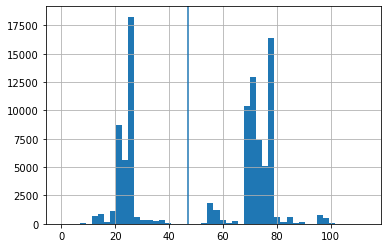

In [5]:
#this section finds a line to divide the dataset into imperial vs metric
beer_df['HighTemp'].hist(bins=50)
plt.axvline(47) #assign cutoff and create new variable to distinguish
beer_df.loc[beer_df['HighTemp'] <=47, 'Flag'] = 'Metric'
beer_df.loc[beer_df['HighTemp'] >47, 'Flag'] = 'Imperial'
beer_df['Flag'].value_counts()

In [6]:
#this section creates a dictionary of the unique values in the 5 adjunct unit columns to be used for a lookup later
adj_unit_cols = ['Adjunct1Unit','Adjunct2Unit','Adjunct3Unit','Adjunct4Unit','Adjunct5Unit']
column_values = beer_df[adj_unit_cols].values.ravel()
unique_values = pd.unique(column_values)
unique_values
convert_keys = [0,.035724, 0,.16667,.033814, 0.5,0.00,0.00,0.2642,0.033814,0.25,.033814,0.033814,24,0.0,0.00,2.2,0.033814,.000035,1/60]
#all small measurements of volume, such as g or ml, are converted to US ounces. Larger units like quart or liter are converted to gallons
#measurements of time are all converted to hours
#tsp and tbsp are converted to US ounces
#measurements that are more subjective, such as 'each', are left alone
adjdict = dict(zip(unique_values, convert_keys))
adjdict

{nan: 0,
 'g': 0.035724,
 'each': 0,
 'tsp': 0.16667,
 'ml': 0.033814,
 'tbsp': 0.5,
 'oz': 0.0,
 'lb': 0.0,
 'L': 0.2642,
 'g/gal': 0.033814,
 'qt': 0.25,
 'g/l': 0.033814,
 'ml/gal': 0.033814,
 'days': 24,
 'hr.': 0.0,
 'gal': 0.0,
 'kg': 2.2,
 'ml/l': 0.033814,
 'mg/l': 3.5e-05,
 'min.': 0.016666666666666666}

In [7]:
kg_cols = [
    "Base Malt Amount",
    "SpecialtyMalt1Amount",
    "SpecialtyMalt2Amount",
    "SpecialtyMalt1Amount",
]
gram_cols = ["hop1amount", "hop2amount", "hop3amount", "hop4amount", "hop5amount"]
temperature_cols = ["LowTemp", "HighTemp"]
adj_cols = ["Adjunct1Num", "Adjunct2Num", "Adjunct3Num", "Adjunct4Num", "Adjunct5Num"]
conversion_cols = kg_cols + gram_cols + temperature_cols + adj_cols
#beer_df.head()

In [8]:
beer_df = beer_df[beer_df.Flag == 'Imperial']

In [9]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58975 entries, 2 to 96537
Columns: 106 entries, Batch_Style to Flag
dtypes: float64(55), int64(1), object(50)
memory usage: 48.1+ MB


In [10]:
#imports for the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,normalize, Normalizer,LabelEncoder, OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from category_encoders.binary import BinaryEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.count import CountEncoder

In [11]:
#encoding is the same as it was for clustering, except the target variables (Category) will be label encoded this time
#variables with over 50% NaN/Missing values are categorized as "highna"
num_highna=['mashph','hop2amount','hop2alpha','hop2time','hop2ibu',
            'hop2percent','hop3amount','hop3alpha','hop3time',
            'hop3ibu','hop3percent','hop4amount','hop4alpha',
            'hop4time','hop4ibu','hop4percent','hop5amount',
            'hop5alpha','hop5time','hop5ibu','hop5percent',
            'Adjunct1Num','Adjunct2Num','Adjunct3Num','Adjunct4Num','Adjunct5Num']
num_lowna = ['Batch_size_liters', 'og', 'fg', 'abv', 'ibu', 'color_levibonds',
       'Base Malt Amount', 'BasePPG', 'BaseColor', 'BasePercentage',
       'SpecialtyMalt1Amount', 'SpecialtyMalt1PPG', 'SpecialtyMalt1Color',
       'SpecialtyMalt1Percentage', 'SpecialtyMalt2Amount', 'SpecialtyMalt2PPG',
       'SpecialtyMalt2Color', 'SpecialtyMalt2Percentage',
       'SpecialtyMalt3Amount', 'SpecialtyMalt3PPG', 'SpecialtyMalt3Color',
       'SpecialtyMalt3Percentage','hop1amount','hop1time','hop1ibu','hop1percent','hop1alpha','Attenuation', 'LowTemp', 'HighTemp']
cat_highna = ['hop2name', 'hop2type', 'hop2timing', 'hop3name',
       'hop3type', 'hop3timing', 'hop4name', 'hop4type', 'hop4timing',
       'hop5name', 'hop5type', 'hop5timing', 'Adjunct1Amount', 'Adjunct1Name', 'Adjunct1Type',
       'Adjunct1Timing', 'Adjunct2Amount', 'Adjunct2Name', 'Adjunct2Type',
       'Adjunct2Timing', 'Adjunct3Amount', 'Adjunct3Name', 'Adjunct3Type',
       'Adjunct3Timing', 'Adjunct4Amount', 'Adjunct4Name', 'Adjunct4Type',
       'Adjunct4Timing', 'Adjunct5Amount', 'Adjunct5Name', 'Adjunct5Type',
       'Adjunct5Timing', 'Adjunct1Unit', 'Adjunct2Unit', 'Adjunct3Unit',
       'Adjunct4Unit', 'Adjunct5Unit']
cat_lowna = ['Category','Batch_Style', 'Base Malt', 'SpecialtyMalt1Name',
       'SpecialtyMalt2Name', 'SpecialtyMalt3Name', 'hop1name', 'hop1type',
       'hop1timing', 'YeastStrain', 'Flocculation',
       'Starter?', 'Flag']

In [12]:
#handles numerical values, imputing the mean and scaling (standard instead of minmax since it handles outliers better)
num_pipeline_lowna = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,strategy="mean")),
        ('standardizer', RobustScaler(with_centering=False))
    ])
num_pipeline_highna = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0)),
        ('standardizer', RobustScaler(with_centering=False))
    ])
#handles categorical values, imputing the most frequent and onehot encoding
cat_pipeline_lowna = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,strategy="most_frequent")),
        ('encoder', CountEncoder(handle_missing='return_nan',min_group_size=.01,combine_min_nan_groups=True))        
    ])
cat_pipeline_highna = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="most_frequent")),
        ('encoder', CountEncoder(handle_missing='return_nan',min_group_size=0.01,combine_min_nan_groups=True))        
    ])
#pulls together two pipelines
pre_pipeline = ColumnTransformer(transformers=[
        ("num_lowna", num_pipeline_lowna, num_lowna),
        ("num_highna", num_pipeline_highna,num_highna),
        ("cat_lowna", cat_pipeline_lowna, cat_lowna),
        ("cat_highna", cat_pipeline_highna, cat_highna),
    ])

In [16]:
number_of_cats = beer_df.Category.unique()
len(number_of_cats)
#lost one category when we dropped all metric records

166

In [13]:
beer_processed = pre_pipeline.fit_transform(beer_df)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

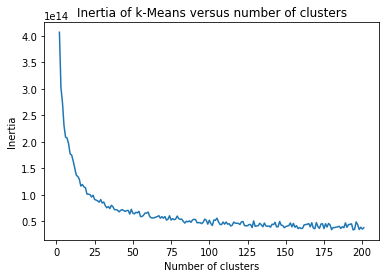

In [18]:
#import necessary packages and plot inertia of MiniBatchKMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
scores = [MiniBatchKMeans(n_clusters=i+2).fit(beer_processed).inertia_ 
          for i in range(200)]
sns.lineplot(np.arange(2, 202), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [14]:
#perform minibatch and normalize minibatch kmeans
kmeans = KMeans(n_clusters=25,random_state=33).fit(beer_processed)
normalized_vectors = preprocessing.normalize(beer_processed)
normalized_kmeans = KMeans(n_clusters=25,random_state=33).fit(normalized_vectors)

In [15]:
#print silhouette score for two kmeans algos
print('kmeans: {}'.format(silhouette_score(beer_processed, kmeans.labels_, 
                                           metric='euclidean'))) #.31
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine'))) #.425

kmeans: 0.3732143870800981
Cosine kmeans:0.4883187030626375


In [22]:
#finding the right value for epsilon using distance measures from Nearest Neighbors
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(beer_processed)
distances, indices = nbrs.kneighbors(beer_processed)

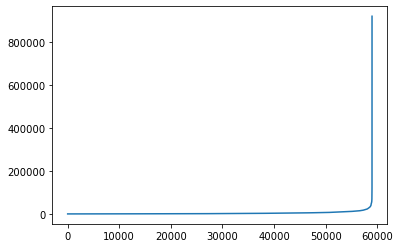

In [23]:
#plot the distances and look for an elbow for epsilon
#chose a minumum sample of around 2x the dimensionality of the dataset, a rule of thumb
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [16]:
dbscan = DBSCAN(eps=58000, min_samples=100, algorithm="ball_tree").fit(beer_processed) #ball tree should help with speed
dblabels= dbscan.labels_
numclusters = len(set(dblabels))
numclusters

28

In [17]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
beer_df = pca.fit_transform(beer_processed)
beer_df.shape

(58975, 19)

In [ ]:
#from sklearn.mixture import GaussianMixture
#n_components = np.arange(1,350,10)
#models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(beer_df)
#        for n in n_components]

#plt.plot(n_components, [m.bic(beer_df) for m in models], label='BIC')
#plt.plot(n_components, [m.aic(beer_df) for m in models], label='AIC')
#plt.legend(loc='best')
#plt.xlabel('n_components');

In [18]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=166, n_init=10) #166 is the number of styles and there is not a significant drop in BIC or AIC afer this point,
# but there is a large difference in time to train
gm.fit(beer_df)

GaussianMixture(n_components=166, n_init=10)

In [19]:
preds = gm.predict_proba(beer_df)

In [20]:
gm.converged_
gm.n_iter_

13

In [21]:
gm.sample(1)
#this model is generative and can easily output a new recipe. Might be a good option for a next step/interrim step before GANs

(array([[ 2.99253575e+00, -4.56236764e-01,  3.55702169e+00,
         -1.64381672e+00,  1.47669616e+00,  2.50944073e+00,
          2.53502763e-01, -5.58348208e-01, -2.39570019e-01,
         -1.93260462e+00,  1.91105836e+00,  1.32885755e+00,
          5.11670407e-01,  1.11141279e+00,  7.84406401e-01,
         -6.33644789e-01,  3.56578037e-01,  3.12510885e-03,
         -1.27496888e+00]]),
 array([51]))

In [22]:
#save model
import pickle
with open('gmm.pkl', 'wb') as f:
    pickle.dump(gm, f)
with open('gmm.pkl', 'rb') as f:
    gm_loaded = pickle.load(f)
gm_loaded

GaussianMixture(n_components=166, n_init=10)

In [23]:
import hdbscan
hdb = hdbscan.HDBSCAN(min_cluster_size=400, min_samples=100, cluster_selection_epsilon=1)
hdb.fit(beer_processed)

HDBSCAN(cluster_selection_epsilon=1, min_cluster_size=400, min_samples=100)

In [24]:
clust_labels = hdb.labels_ #save labels as variable/set
hdb.labels_.max() # number of clusters

56

<AxesSubplot:ylabel='distance'>

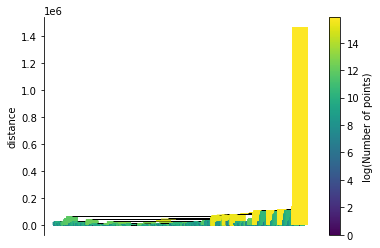

In [25]:
hdb.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

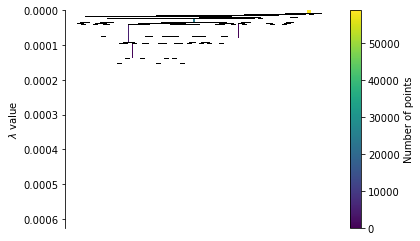

In [26]:
hdb.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

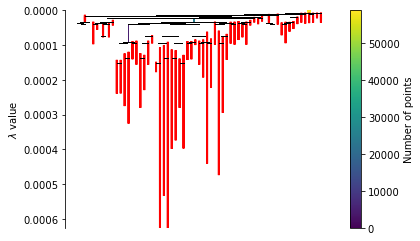

In [27]:
hdb.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [32]:
#score of dbscan model (uses density vs distance)
print('DBSCAN score:{}'.format(silhouette_score(beer_processed,
                                          dbscan.labels_,
                                          metric='cosine')))     #.65

DBSCAN score:0.6465803317141475


In [29]:
print('HDBSCAN score:{}'.format(silhouette_score(beer_processed,
                                          hdb.labels_,
                                          metric='cosine'))) #.476

HDBSCAN score:0.4763735832734611


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
#this uses the output and labels of the DBSCAN to allow prediction of new instances, since DBSCAN isn't readily equipped to do that
#it might be a good bet for deployment

KNeighborsClassifier(n_neighbors=50)

In [35]:
#save model
import pickle
with open('knn_dbscan.pkl', 'wb') as f:
    pickle.dump(knn, f)
with open('knn_dbscan.pkl', 'rb') as f:
    knn_loaded = pickle.load(f)
knn_loaded

KNeighborsClassifier(n_neighbors=50)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(beer_processed)
pca_2d = pca.transform(beer_processed)
for i in range(0, pca_2d.shape[0]):
    c = plt.scatter(pca_2d[i,0],pca_2d[i,1])
plt.title('DBSCAN finds 35 clusters and noise')
plt.show()

In [ ]:
#pca and visaulization of clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(beer_processed)

#plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [ ]:
#tsne for visualization, need to debug
from sklearn.manifold import TSNE
tsne_3d_df = TSNE(n_compenents=3, beer_processed, kmeans.labels_)
tsne_3d_df['normalized_kmeans'] = normalized_kmeans.labels_
tsne_3d_df['dbscan'] = dbscan.labels_

plot_animation(tsne_3d_df, 'kmeans', 'kmeans')
plot_animation(tsne_3d_df, 'normalized_kmeans', 'normalized_kmeans')
plot_animation(tsne_3d_df, 'dbscan', 'dbscan')

In [ ]:
#feature importance exploration
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(beer_processed))
df_scaled['dbscan'] = dbscan.labels_
df_mean = (df_scaled.loc[df_scaled.dbscan!=-1, :]
                    .groupby('dbscan').mean())

In [ ]:
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['dbscan']
tidy = df_scaled[selected_columns].melt(id_vars='dbscan')
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy)